# MATPLOTLIB

- simple graphs:

    - (line)plot
    - bar
    - histogram
    - pie
    - scatterplot

- superposing of graphs:

    - label
    - legend

- formatting

    - title
    - axis
    - (x/y)ticks
    - labels
    - color
    - markers
    - figure

- sub-graphs

    - subplot
    - subplots
    - suptitle
    - tight_layout

- intermediate graphs:

    - add data/column labels

- images and array plots

    - imshow

- seaborn library


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


documentation:  
https://matplotlib.org/stable/gallery/index.html

exemples:  
https://matplotlib.org/stable/gallery/index.html

# Simple graphs

## lineplot

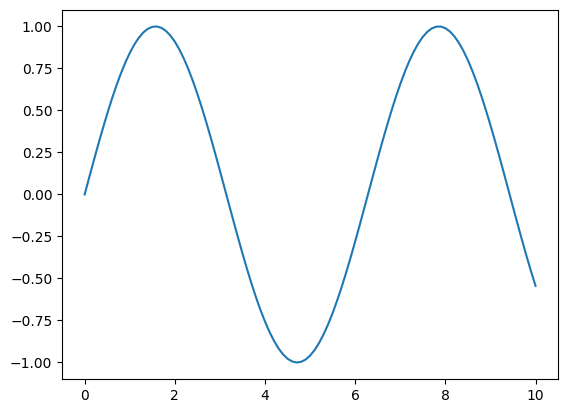

In [2]:
### create list of values in floats
x = np.linspace(0, 10, 101) # start (included), stop(included), number_of_values  

### plot= line-plot; plot(x,y,*args)

plt.plot(x, np.sin(x)) 

### show result of graphic
plt.show() 

# barplot

In [3]:
dict_map = {0:'a',1:'b',2:'c'}

df1 = pd.DataFrame(data = [{'num':np.random.normal(10+k,2+k,1)[0],
                            'cat':dict_map[k],
                            'cat2':dict_map[(k+1)%3],
                            'num2':np.random.randint(2*k,10+2*k,1)[0],
                           } for k in np.random.randint(0,3,size=(10_000))]
                  )
display(df1)

gb1 = df1.groupby('cat').mean(numeric_only=True).reset_index()
gb1

,num,cat,cat2,num2
0,13.995826,b,c,4
1,12.702499,c,a,8
2,10.169543,c,a,4
3,12.234697,c,a,9
4,13.290359,b,c,8
...,...,...,...,...
9995,10.204818,b,c,11
9996,8.159976,b,c,5
9997,15.448103,c,a,9
9998,14.006035,c,a,6


,cat,num,num2
0,a,10.011303,4.450206
1,b,10.928439,6.487988
2,c,12.026815,8.467643


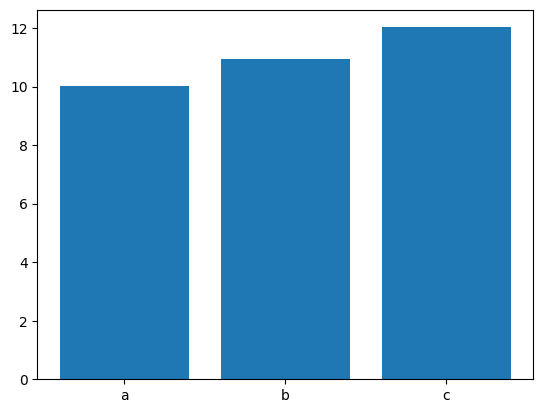

In [4]:
plt.bar(x=gb1['cat'],height= gb1['num'], )
plt.show()

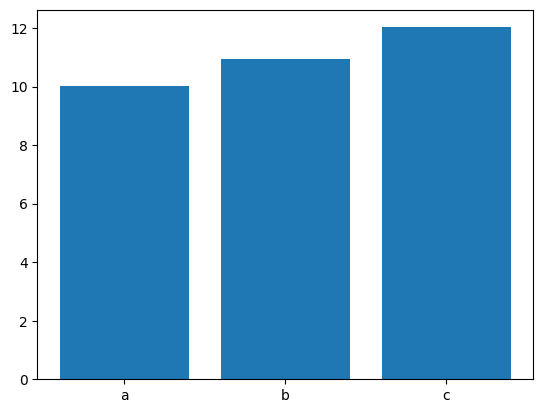

In [5]:
plt.bar(data=gb1, x='cat',height='num')
plt.show()

## histogram

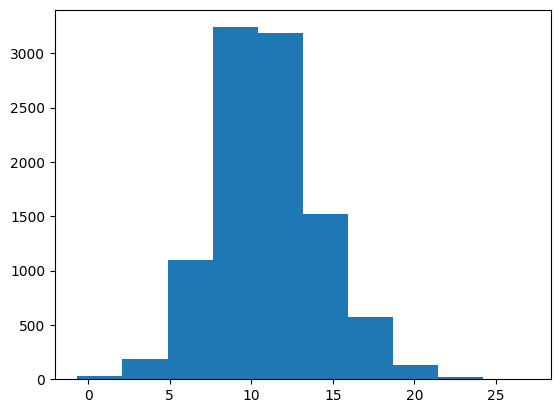

In [6]:
plt.hist(data = df1 , x='num')
plt.show()

## pie

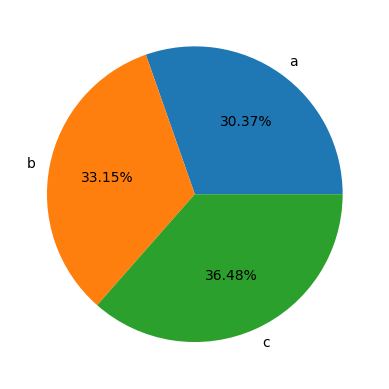

In [7]:
plt.pie(data=gb1, x='num', labels='cat', autopct='%1.2f%%')
plt.show()

## scatterplot

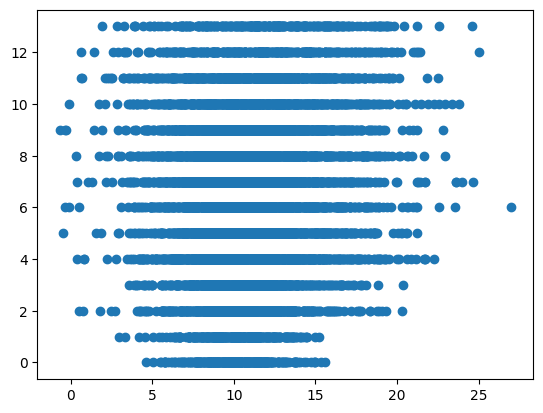

In [8]:
plt.scatter(data=df1, x='num',y='num2')
plt.show()

# Superposing

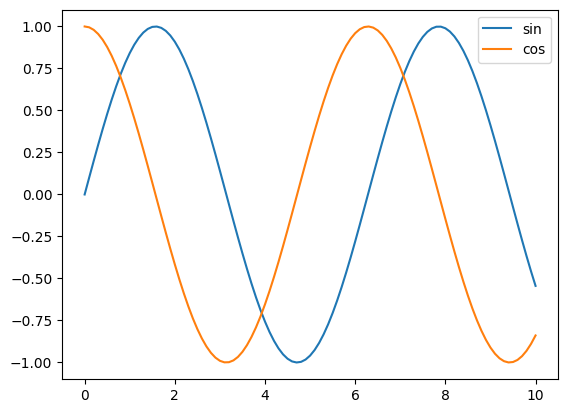

In [9]:
x = np.linspace(0, 10, 101) 


plt.plot(x, np.sin(x), label='sin') 
plt.plot(x, np.cos(x), label='cos') 

plt.legend()
plt.show()

In [10]:
gb2 = df1.groupby(['num2','cat']).std(numeric_only=True).reset_index()
gb2

,num2,cat,num
0,0,a,1.959652
1,1,a,2.059283
2,2,a,2.145573
3,2,b,3.257055
4,3,a,2.049077
5,3,b,3.094611
6,4,a,2.089255
7,4,b,2.976202
8,4,c,4.136907
9,5,a,1.882086


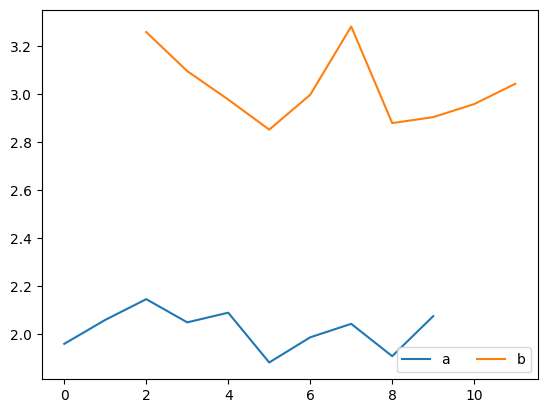

In [11]:
plt.plot('num2','num',data=gb2.loc[gb2['cat']=='a'], label ='a')
plt.plot('num2','num',data=gb2.loc[gb2['cat']=='b'], label ='b')
plt.legend(loc='lower right', ncol=2)
plt.show()

# Formatting

In [12]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [13]:
def myfunct(x):
    
    y = np.exp(-0.5*(x-5)**2)
    
    return y

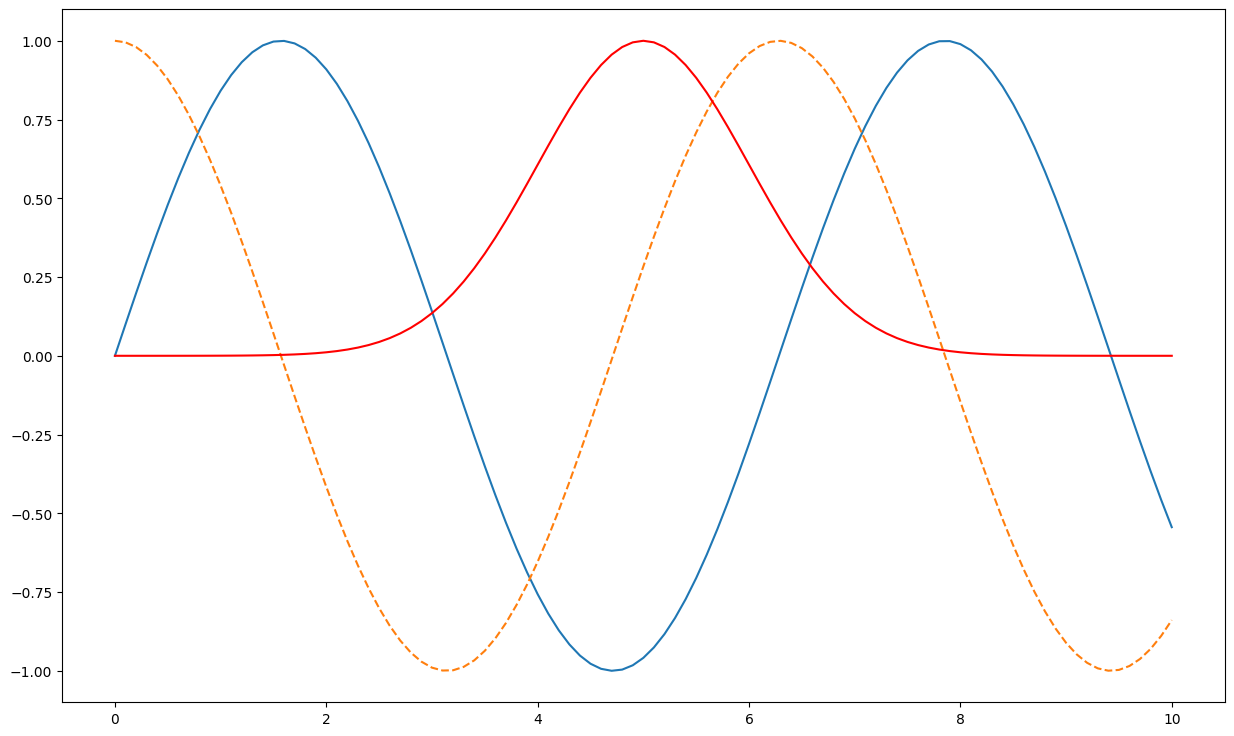

In [14]:

plt.figure(figsize=(15, 9)) # figsize = taille pouces

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.plot(x, myfunct(x), c='r')

plt.savefig('demo.pdf') #png,...
plt.show() # toujours la dernière étape

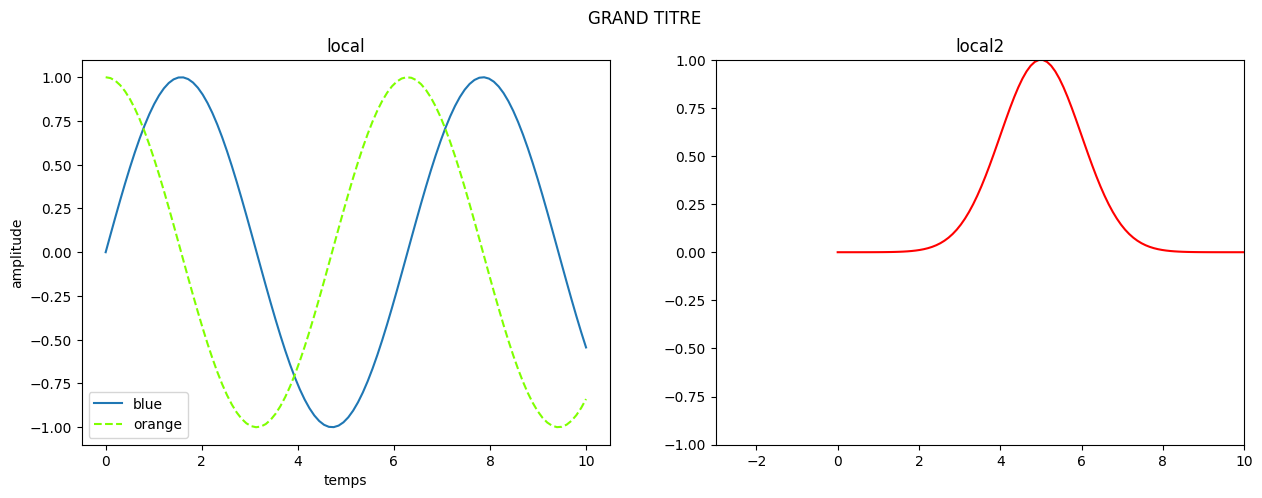

In [15]:
### alternative à la syntaxe suivante

x= np.linspace(0, 10, 100) # x = [i/10 for i in range(10*(10)+1)]


### taille 
plt.figure(figsize=(15, 5)) # taille en pouces

### super titre
plt.suptitle('GRAND TITRE')

### je construit un sous-graphique, 1 row, 2 cols, 1er graphique
### toutes les modif vont s'appliquer à ce sous-graph
plt.subplot(1,2,1) 
## titre sous-graphique
plt.title('local')
plt.plot(x, np.sin(x), '-', label = 'blue') # label== nommer la couche -> legende
plt.plot(x, np.cos(x), '--', label = 'orange',c='chartreuse') ## pour la legende
### afficher legende
plt.legend() ## ce place automatiquement , le plus idéal

### nommer les axes
plt.xlabel('temps')
plt.ylabel('amplitude')


### definir le 2ième sous-graphique
plt.subplot(1,2,2)
plt.title('local2')
plt.plot(x, myfunct(x), c='r')

### modif des val min-max des axes
## [xmin, xmax,ymin, ymax]
plt.axis([-3,10,-1,1])

plt.savefig('savepdf.pdf')
plt.show() # toujours la dernière étape

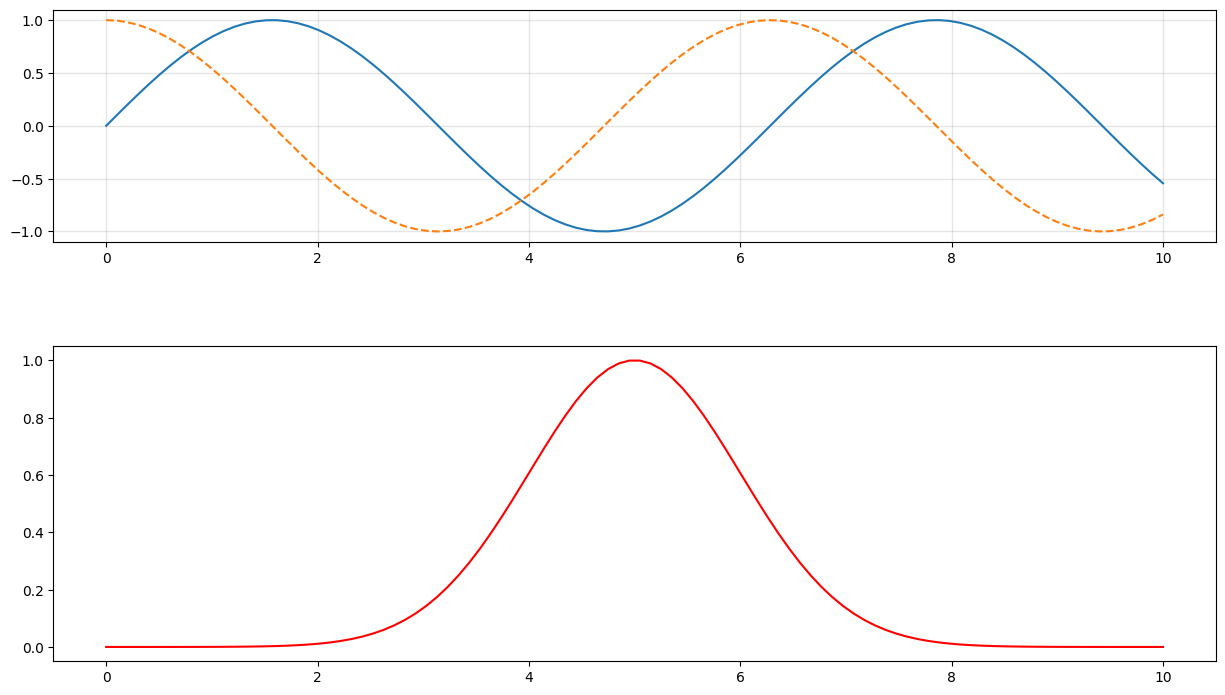

In [16]:
## fig= full graph, ax = indexation sous-graphiques
## nrows = nbr lines de sous graphs
## cols = idem en colonnes

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15, 9))

ax[0].plot(x, np.sin(x), '-') # compter àpd 0
ax[0].plot(x, np.cos(x), '--') 

ax[1].plot(x, myfunct(x), c='r')

ax[0].grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
ax[0].set( aspect='equal')


### sauvegarder le graphique complet, en pdf (png,...)
fig.savefig('savepdf_1.pdf')
plt.show()

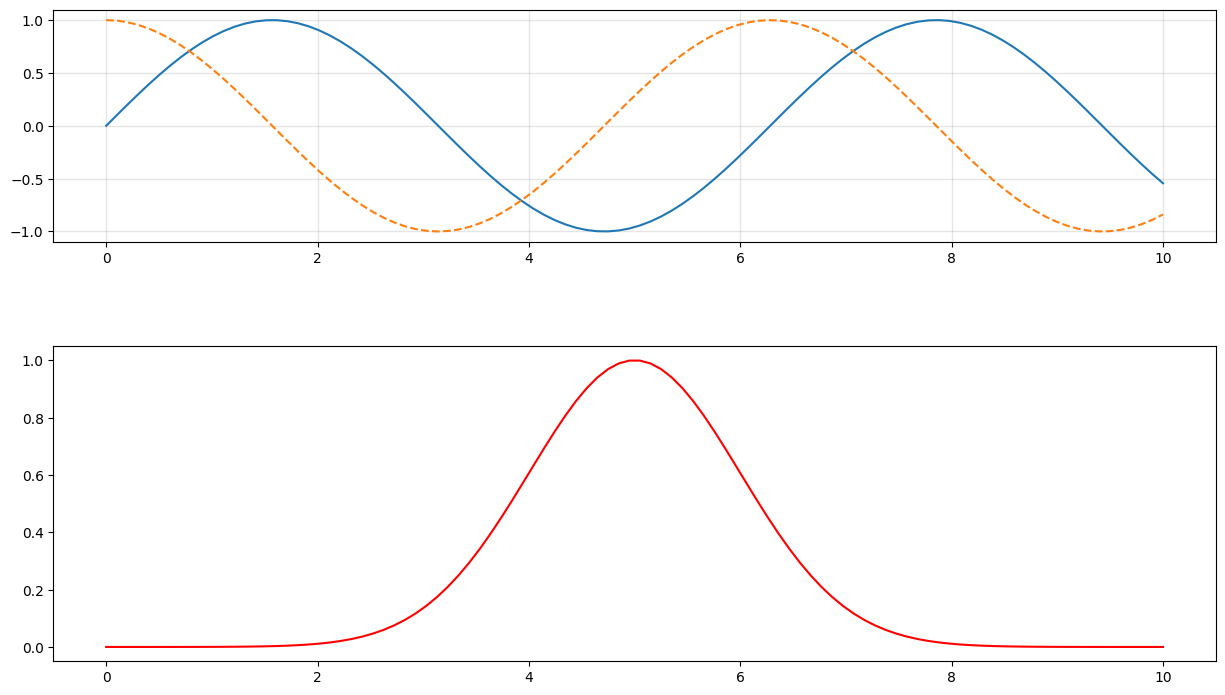

In [17]:
fig

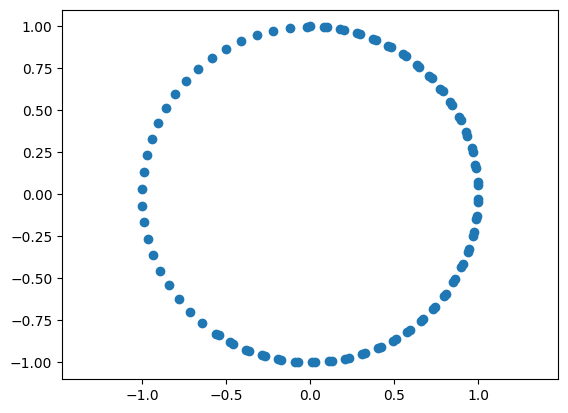

In [18]:
### scatter = nuage de points
plt.scatter(np.sin(x),np.cos(x))
plt.axis('equal')
plt.show()

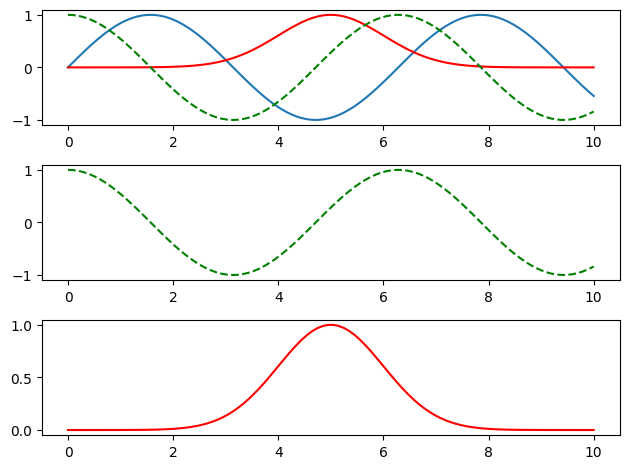

In [19]:
# definir graph contient 3-sub
plt.subplot(3, 1, 1) # (rows, columns, panel number (start @1))
plt.plot(x, np .sin(x))
plt.plot(x, myfunct(x), c='r')
plt.plot(x, np .cos(x), '--', c='green')


plt.subplot(3, 1, 2)
plt.plot(x, np .cos(x), '--', c='green')

plt.subplot(3, 1, 3)
plt.plot(x, myfunct(x), c='r')

### utiliser le tight_layout== ajouter padding pour eviter le chevauchement des graphiques
plt.tight_layout() 


plt.savefig('savepdf_2.pdf')
plt.show()

exemples de graphiques:
https://matplotlib.org/stable/gallery/index

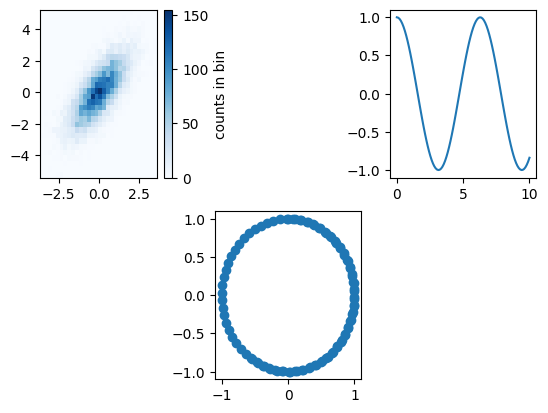

In [20]:
### construction de données artificielles

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T


### ------------ ###





plt.subplot(2,3,1) ## compter àpd 1
plt.hist2d(x, y, bins=30, cmap='Blues') # acces à plains de graphiques différents
cb = plt.colorbar()
cb.set_label('counts in bin')

### pas obligé de construire les graphiques dans l'ordre 1,2,3...
z = np.linspace(0,10,100)

plt.subplot(2,3,5)
plt.scatter(np.sin(z),np.cos(z))


plt.subplot(2,3,3)
plt.plot(z, np.cos(z), '-')

plt.show()

# graphiques pour EDA/stats

[-40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6
  -4  -2   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30
  32  34  36  38  40]


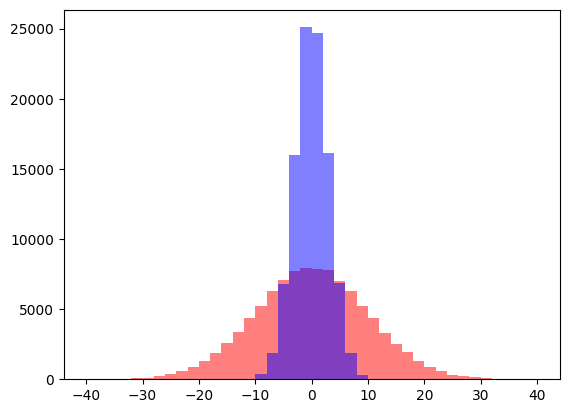

In [29]:
### construction de données
v = np.random.normal(0,3,100_000)
w = np.random.normal(0,10,100_000)

### bins=compartiment pour l'histogramme
bins = np.arange(-40,41,2) # arange(start,stop,step) == list(range(start,stop,step))
### des compartiment : [-40,-38[ ,  [-38, -36[,...
print(bins)

### python: dict avec les params 
pars = {'alpha':0.5,'bins':bins}


plt.hist(w,color='red',**pars, label ="w") # utiliser les params 'pars' du dictionnaire: voir arguments dans fonctions python
plt.hist(v,color='blue',**pars , label = "v")

#plt.hist(w,color='red',alpha=0.5,bins=bins, label ="w") # utiliser les params 'pars' du dictionnaire: voir arguments dans fonctions python
#plt.hist(v,color='blue',alpha=0.5,bins=bins,, label = "v")


plt.show()

In [22]:
pars

{'alpha': 0.5,
 'bins': array([-40, -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16,
        -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,
         12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,
         38,  40])}

[-40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6
  -4  -2   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30
  32  34  36  38  40]


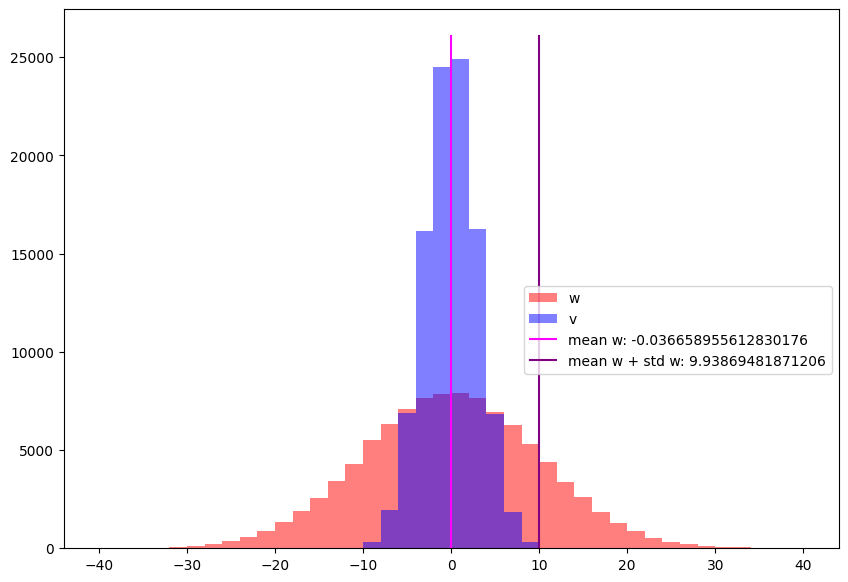

In [30]:
v = np.random.normal(0,3,100_000)
w = np.random.normal(0,10,100_000)

mean_w = np.mean(w)
std_w = np.std(w)

bins = np.arange(-40,41,2)
print(bins)

pars = {'alpha':0.5,'bins':bins}

fig = plt.figure(figsize=(10,7))

plt.hist(w,color='red',**pars, label ="w")
plt.hist(v,color='blue',**pars , label = "v")

### plus avancé : recuperer les min,max du graph existant
ymin, ymax = plt.gca().get_ylim()


### ajouter ligne verticale (horz = hlines)
plt.vlines(mean_w, # x-pos
           ymin=ymin, 
           ymax=ymax,
           color='magenta', 
           label = f'mean w: {mean_w}')

plt.vlines(mean_w+std_w,
           ymin=ymin,
           ymax=ymax,
           color='purple', 
           label = f'mean w + std w: {mean_w + std_w}')

### possibilité de changer l'emplacement de la légende
plt.legend(#loc='center left' # le plus à changer (sans 'bbox_to_achor')
           bbox_to_anchor=(1, 0.5)) #(permet de changer la position plus finement, plus chipoter)
plt.show()

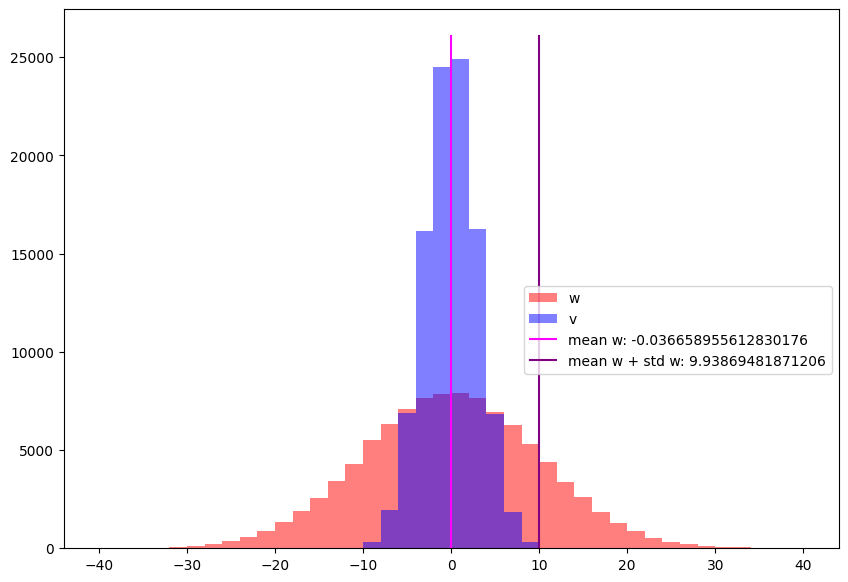

In [31]:
fig

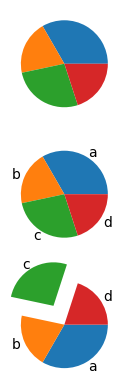

In [32]:
### creation data

cat = list('abcd')
sze = np.random.randint(2,8,4)
evid = (0,0,0.5,0) 

### pie-plot

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

plt.subplot(3,1,1)
plt.pie(x=sze)

plt.subplot(3,1,2)
plt.pie(x=sze, labels=cat)


plt.subplot(3,1,3)
plt.pie(x=sze
        ,labels=cat
        
        ,explode=evid
        ,counterclock=False
       )
plt.show()

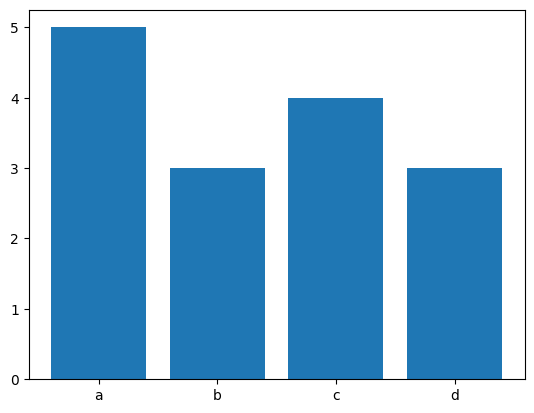

In [33]:
plt.bar(x=cat,height=sze, ) ## sze = la hauteur : faudra faire une aggregation pour cette valeur
plt.show()

## end graph eda

## graph: show images

[[225 174  52 ...  44 109 144]
 [122 152  65 ... 150 118 103]
 [ 80  83 148 ...  50 138  82]
 ...
 [228 200 124 ... 238  94  14]
 [188 254 165 ... 141  81  85]
 [  9  77 175 ...   7  10 164]]


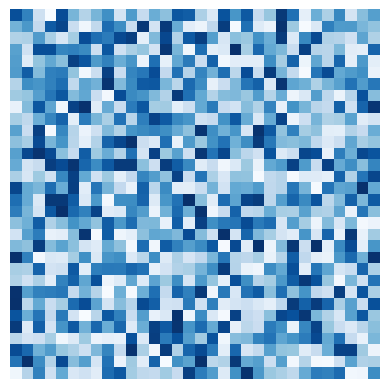

In [34]:
pix = np.random.randint(0,256,(32,32)) ### noir-blanc
print(pix)


plt.imshow(pix,cmap='Blues') # afficher en teinte de bleues
plt.axis('off')
plt.show()

In [35]:
pix = np.random.randint(0,256,(32,32,4)) ## 3= 3channel == (r,g,b), 4 =r,g,b,alpha
print(pix)

[[[206 161  33  34]
  [192 162 201 179]
  [125 240  40 153]
  ...
  [196 106 157 120]
  [195  16 208 244]
  [168  23  82 114]]

 [[ 34 154  35  26]
  [226 133 106  99]
  [126 240  75  89]
  ...
  [237   6 186  34]
  [ 71  78 181  12]
  [196 130 166 154]]

 [[230 139 155 193]
  [195 245 249 176]
  [223 175 227  18]
  ...
  [179 243 192 127]
  [ 94 253  95  70]
  [138  10 197  59]]

 ...

 [[ 85 218 100   1]
  [200 138 168 192]
  [181  70  11   4]
  ...
  [184 165  52 123]
  [125 215 231 107]
  [217 121  73  40]]

 [[ 96  50 126 178]
  [202  79   9 227]
  [187 255  51 248]
  ...
  [ 68 113 193 204]
  [247 114 247 204]
  [247 203  23 246]]

 [[ 81  40 156   6]
  [107   4   6 169]
  [121  26 201  68]
  ...
  [ 11   1  18 186]
  [ 86 153 150 242]
  [221 188  60  75]]]


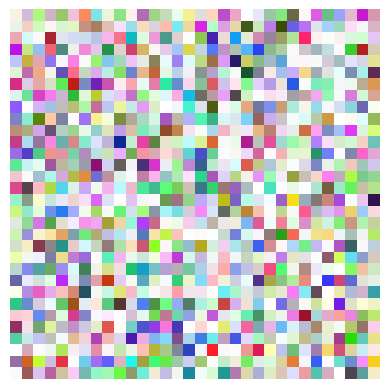

In [36]:
plt.imshow(pix)#,cmap='Blues')
plt.axis('off') ### retirer les axes
plt.show()

# Fake dataset with Numpy

In [37]:
N = 10_000

category = np.random.randint(0,5,N)
dict_  = dict(zip(
        range(5)
        ,['red','green','blue', 'purple','cyan']
    ))

color = np.array([dict_[i] for i in category])


def custom_blob(cat_val):   
    return np.random.normal(10*cat_val,1+2*cat_val,1)[0]

def custom_blob2(cat_val):
    return np.random.normal(5*cat_val,1+0.5*cat_val,1)[0]

blob1 = np.array([custom_blob(i) for i in category])
blob2 = np.array([custom_blob2(i) for i in category])

In [38]:
blob1

array([ 7.69289083, 32.26806097, 44.92367128, ..., 12.51019541,
       30.90438905, 19.28304264])

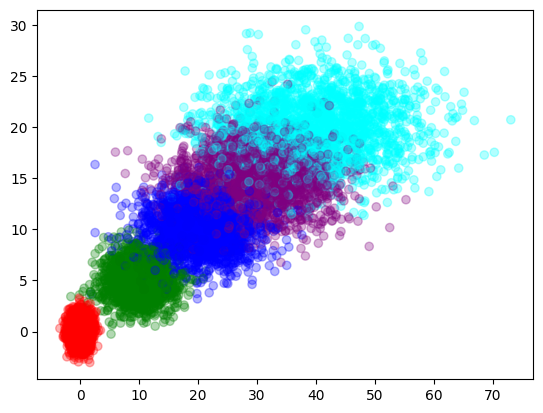

In [39]:
plt.scatter(x=blob1
            ,y=blob2
            ,c=color
            , alpha= 0.3
           )

plt.show()

In [40]:

### indexation booléene sur 'rouge'
is_red = color=="red"
mean_1_red = blob1[is_red].mean()
mean_2_red = blob2[is_red].mean()


is_blue = color=='blue'
mean_1_blue = blob1[is_blue].mean()
mean_2_blue = blob2[is_blue].mean()



### même chose mais systematique

M1 = []
M2 = []
C = np.unique(color)

for c in C:
    M1.append(blob1[color == c].mean())
    M2.append(blob2[color == c].mean())

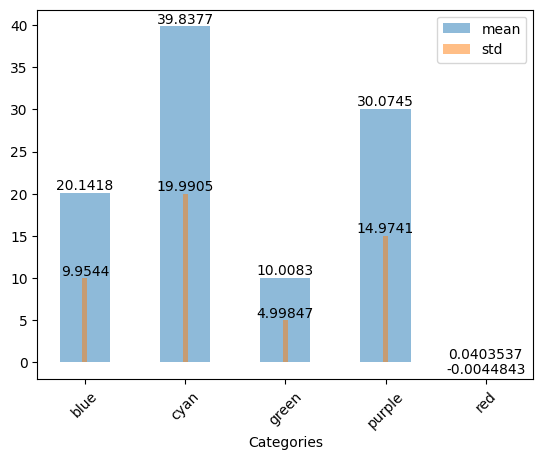

In [41]:
fig,ax = plt.subplots()

plt.bar(x=C , height=M1, alpha=0.5, width = 0.5, label='mean')
plt.bar(x=C , height=M2, alpha=0.5, width= 0.05 , label = 'std')

for bars in ax.containers:
    ax.bar_label(bars) # afficher la valeur d'une barre

plt.xticks(rotation=45)
plt.xlabel('Categories')

plt.legend()
plt.show()

# Fake dataset with Pandas

In [42]:

N = 100_000

category = np.random.randint(0,5,N)


fake = pd.DataFrame({'cat':category})
fake['txt']=fake['cat'].map(dict(zip(range(5),list('abcde')))) ### associer 0:a, 1:b,...
fake

,cat,txt
0,3,d
1,3,d
2,4,e
3,1,b
4,3,d
...,...,...
99995,4,e
99996,1,b
99997,1,b
99998,3,d


In [43]:

def custom_blob(cat_val,N):
    """ajouter des données quantitatives qui dépendent des variables qualitatives: pour moy et ecart-type """
    return np.random.normal(10*cat_val,1+2*cat_val,1)[0]

def custom_blob2(cat_val):
    return np.random.normal(5*cat_val,1+0.5*cat_val,1)[0]
    
fake['num'] = fake['cat'].apply(custom_blob,args=[N])
fake['num2'] = fake['cat'].apply(custom_blob2)

In [44]:
fake

,cat,txt,num,num2
0,3,d,28.898701,11.648374
1,3,d,40.191215,16.057879
2,4,e,46.103970,21.970207
3,1,b,13.600230,5.845770
4,3,d,31.235024,9.587406
...,...,...,...,...
99995,4,e,18.567432,19.143896
99996,1,b,6.566096,4.212782
99997,1,b,4.760945,4.091481
99998,3,d,41.960384,17.724800


In [45]:
fake['colors'] = fake['txt'].map(
    dict(zip(
        list('abcde')
        ,['red','green','blue', 'purple','cyan']
    ))
)

fake

,cat,txt,num,num2,colors
0,3,d,28.898701,11.648374,purple
1,3,d,40.191215,16.057879,purple
2,4,e,46.103970,21.970207,cyan
3,1,b,13.600230,5.845770,green
4,3,d,31.235024,9.587406,purple
...,...,...,...,...,...
99995,4,e,18.567432,19.143896,cyan
99996,1,b,6.566096,4.212782,green
99997,1,b,4.760945,4.091481,green
99998,3,d,41.960384,17.724800,purple


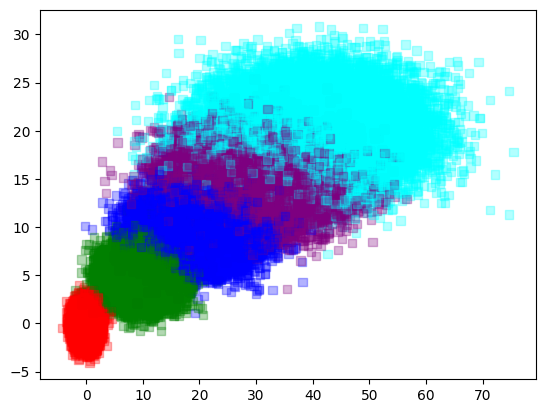

In [46]:
plt.scatter(x=fake['num']
            ,y=fake['num2']
            ,c=fake['colors'].values
            , marker='s' # s= square
            , alpha= 0.3
           )

plt.show()

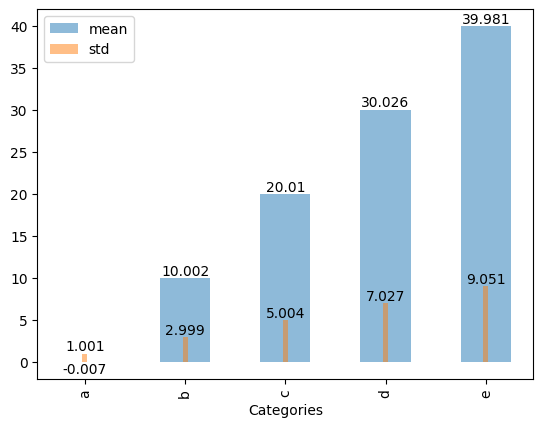

In [47]:
GB = fake.loc[:,['txt','num']].groupby('txt').mean().round(3)
GB2 = fake.loc[:,['txt','num']].groupby('txt').std().round(3)

fig,ax = plt.subplots()
### afficher les moy et std sur même graphique
plt.bar(x=GB.index,height=GB.num, alpha=0.5, width = 0.5, label='mean')
plt.bar(x=GB2.index,height=GB2.num, alpha=0.5,width=0.05, label = 'std')

### afficher les valeurs des moy et std (vals/hauteur des barplot)
for bars in ax.containers:
    ax.bar_label(bars)

### xticks = modif l'affichage des axes
plt.xticks(rotation=90) 
plt.xlabel('Categories')

plt.legend()
plt.show()

### methode apply de pandas:


doc = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [48]:
def ajouter_1(x_row):
    
    return x_row +1

In [49]:
## creer une nouvelle col "+1"
fake["+1"]  = fake["cat"].apply(ajouter_1) ## appliquer l'operation 'ajouter_1' aux vals de "cat"
display(fake)

,cat,txt,num,num2,colors,+1
0,3,d,28.898701,11.648374,purple,4
1,3,d,40.191215,16.057879,purple,4
2,4,e,46.103970,21.970207,cyan,5
3,1,b,13.600230,5.845770,green,2
4,3,d,31.235024,9.587406,purple,4
...,...,...,...,...,...,...
99995,4,e,18.567432,19.143896,cyan,5
99996,1,b,6.566096,4.212782,green,2
99997,1,b,4.760945,4.091481,green,2
99998,3,d,41.960384,17.724800,purple,4
